<a href="https://colab.research.google.com/github/Swami-Siva-Rama-Raju/ML-Algorithms-Projects/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Neccessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

**Loading Dataset**

In [2]:
heart_df = pd.read_csv('/content/drive/MyDrive/Decision Tree/heart.csv')

**Understanding Dataset**

In [3]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
heart_df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
737,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
813,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
96,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
924,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1


In [6]:
heart_df.shape

(1025, 14)

In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(heart_df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


**Data Cleaning**

In [11]:
heart_df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
heart_df.duplicated().sum()

723

In [13]:
#remove duplicates
heart_df.drop_duplicates(inplace=True)

In [14]:
heart_df.duplicated().sum()

0

In [15]:
heart_df.shape

(302, 14)

**Exploratary Data Analysis(EDA)**

In [16]:
#target column value counts
heart_df['target'].value_counts()

,count
target,
1,164
0,138


0.   No Disease
1.   Disease



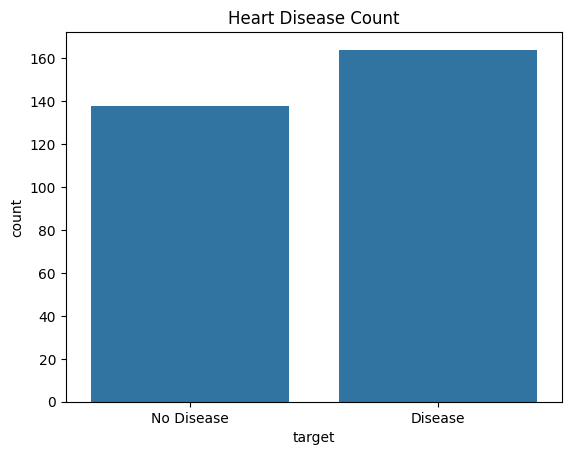

In [17]:
#count plot of target column
sns.countplot(x=heart_df['target'])
plt.xticks([0,1],['No Disease','Disease'])
plt.title('Heart Disease Count')
plt.show()

In [18]:
#Disease percentage and No DIsease percentage
df=pd.DataFrame(heart_df['target'].value_counts()/len(heart_df['target'])*100).rename(index={1:'Disease', 0:'No Disease'})
df.columns=['Percentage']
df

,Percentage
target,
Disease,54.304636
No Disease,45.695364


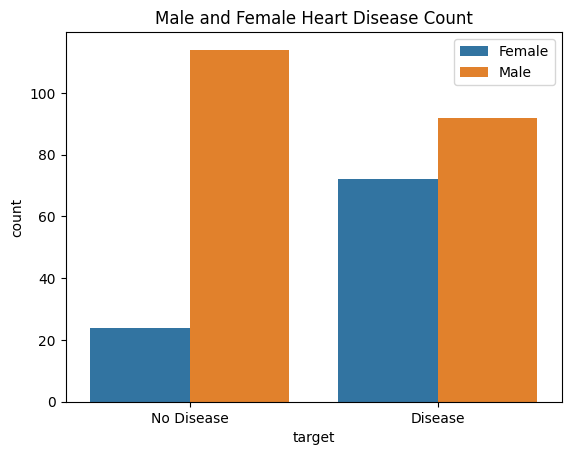

In [19]:
#count plot for male and female
sns.countplot(x=heart_df['target'],hue=heart_df['sex'])
plt.title('Male and Female Heart Disease Count')
plt.xticks([0,1],['No Disease','Disease'])
plt.legend(labels=['Female','Male'])
plt.show()

*Females have more disease percentage than males*

In [20]:
#Analyzing Chest pain type
heart_df['cp'].unique()

array([0, 1, 2, 3])

*0: typical angina,1: atypical angina, 2: non-anginal pain, 3: asymptomatic*

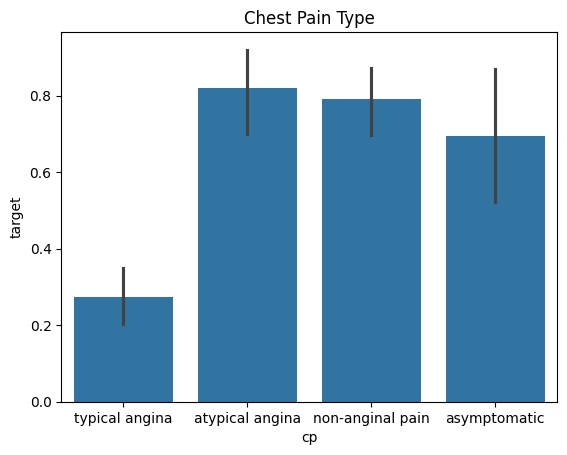

In [21]:
#barplot for cp column
sns.barplot(x=heart_df['cp'],y=heart_df['target'])
plt.title('Chest Pain Type')
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.show()

In [22]:
#Analyzing Fbs column
heart_df['fbs'].unique()

array([0, 1])

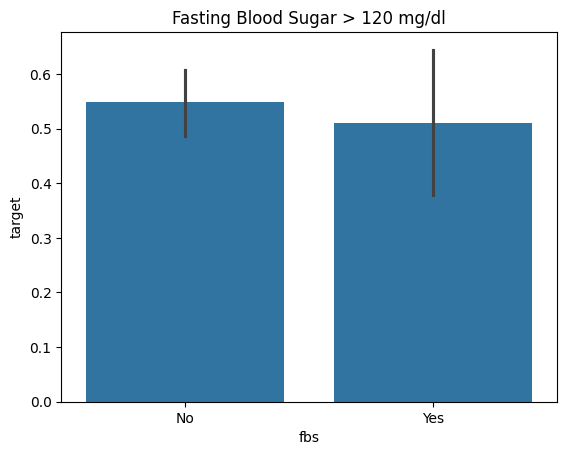

In [23]:
#barplot for fbs column
sns.barplot(x=heart_df['fbs'],y=heart_df['target'])
plt.title('Fasting Blood Sugar > 120 mg/dl')
plt.xticks([0,1],['No','Yes'])
plt.show()

In [24]:
#analyzing restecg column
heart_df['restecg'].unique()

array([1, 0, 2])

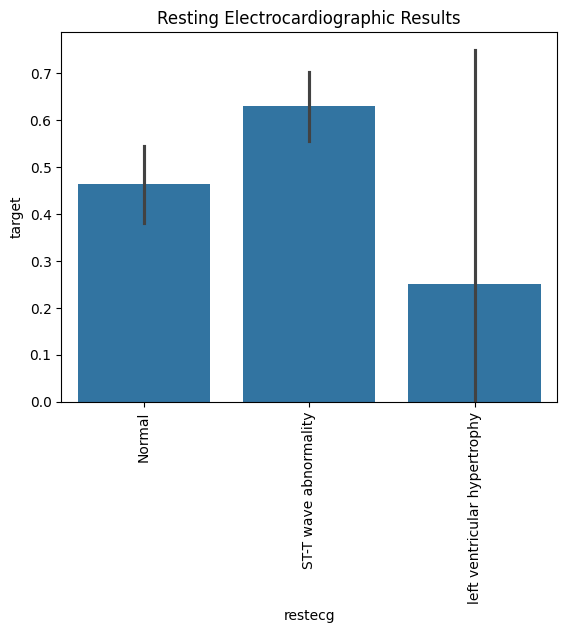

In [25]:
#barplot for restecg column
sns.barplot(x=heart_df['restecg'],y=heart_df['target'])
plt.title('Resting Electrocardiographic Results')
plt.xticks([0,1,2],['Normal','ST-T wave abnormality','left ventricular hypertrophy'],rotation=90)
plt.show()

In [26]:
#analyzing exang feature
heart_df['exang'].unique()

array([0, 1])

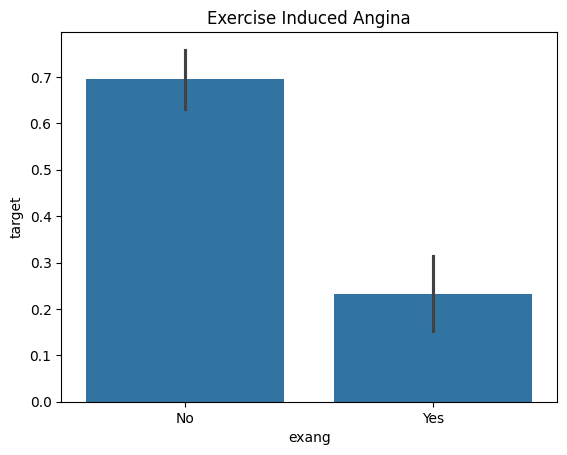

In [27]:
#barplot for exang column
sns.barplot(x=heart_df['exang'],y=heart_df['target'])
plt.title('Exercise Induced Angina')
plt.xticks([0,1],['No','Yes'])
plt.show()

In [28]:
#analyze slope feature
heart_df['slope'].unique()

array([2, 0, 1])

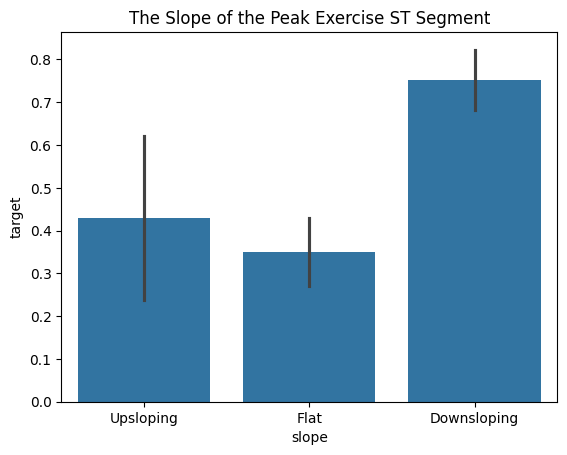

In [29]:
#barplot of slope feature
sns.barplot(x=heart_df['slope'],y=heart_df['target'])
plt.title('The Slope of the Peak Exercise ST Segment')
plt.xticks([0,1,2],['Upsloping','Flat','Downsloping'])
plt.show()

In [30]:
#analyzing ca feature
heart_df['ca'].unique()

array([2, 0, 1, 3, 4])

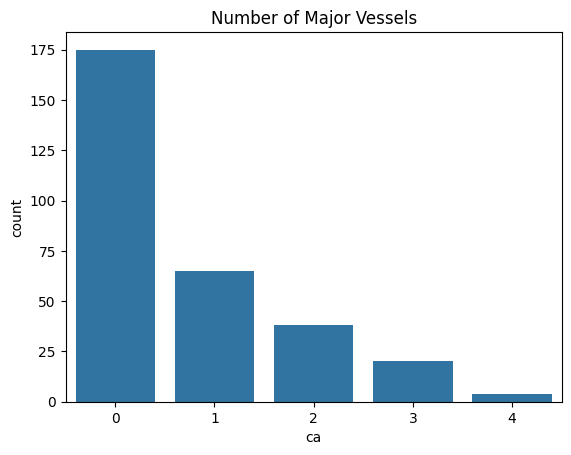

In [31]:
#countplot of ca feature
sns.countplot(x=heart_df['ca'])
plt.title('Number of Major Vessels')
plt.xticks([0,1,2,3,4],['0','1','2','3','4'])
plt.show()

In [32]:
#analyzing thal feature
heart_df['thal'].unique()

array([3, 2, 1, 0])

*0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)*

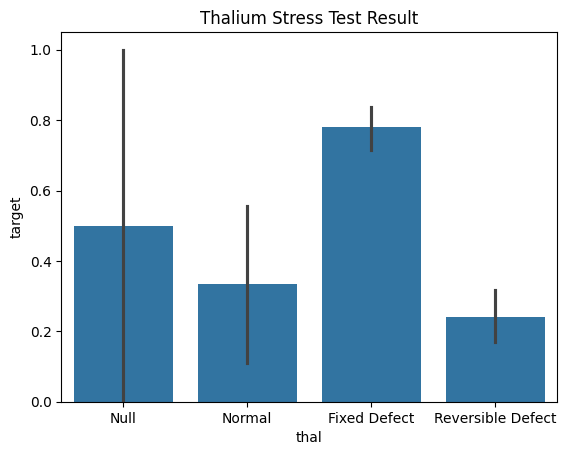

In [33]:
#barplot of thal feature
sns.barplot(x=heart_df['thal'],y=heart_df['target'])
plt.title('Thalium Stress Test Result')
plt.xticks([0,1,2,3],['Null','Normal','Fixed Defect','Reversible Defect'])
plt.show()

In [34]:
#finding correlation between target and other features
corr_matrix = heart_df.corr()
corr_matrix['target'].sort_values(ascending=False)

,target
target,1.000000
cp,0.432080
thalach,0.419955
slope,0.343940
restecg,0.134874
fbs,-0.026826
chol,-0.081437
trestbps,-0.146269
age,-0.221476
sex,-0.283609


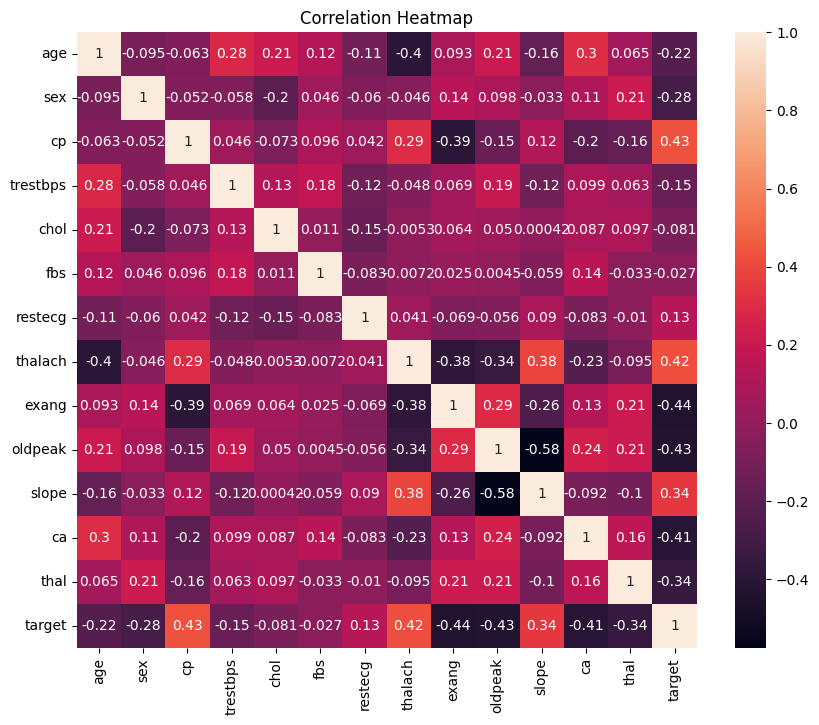

In [35]:
#heatmap for correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

**Train Test Split**

In [36]:
#seperating Independent and Dependent features
X = heart_df.drop(columns=['target'])
y = heart_df['target']

In [37]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 13), (61, 13), (241,), (61,))

**Model Fitting**

In [39]:
max_accuracy =0
for x in range(200):
  dt_clf = DecisionTreeClassifier(random_state=x)
  dt_clf.fit(X_train, y_train)
  y_pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  if accuracy>max_accuracy:
    max_accuracy = accuracy
    best_state = x
print('Best accuracy is', max_accuracy, 'on random state', best_state)

Best accuracy is 0.8032786885245902 on random state 112


In [40]:
model_dt=DecisionTreeClassifier(random_state=112)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [42]:
print(confusion_matrix(y_test, y_pred))

[[26  6]
 [ 6 23]]


In [43]:
print("Accuracy Percentage is :",round(accuracy_score(y_test, y_pred)*100,2),"%")

Accuracy Percentage is : 80.33 %
